In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

# Prepare Data

## Load Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
def load_dataset():
    data = load_breast_cancer()
    df = pd.DataFrame(data['data'])
    df.columns = data['feature_names']
    df['cat 1'] = (df['mean radius'] + df['mean texture'] < df['worst radius'] / 0.5).astype('int')
    df['cat 2'] = (df['mean compactness'] * df['mean concavity'] < df['mean smoothness'] / 10).astype('int')
    df['cat 3'] = (df['mean symmetry'] / df['mean smoothness'] < df['worst symmetry'] * 7).astype('int')

    return copy.deepcopy(df)

In [5]:
df = load_dataset()
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0,0


## Simulate missing values

In [6]:
# 30% of data will be NaN
missing = 0.3
i_range, j_range = df.shape

for i in range(i_range):
    for j in range(j_range):
        if np.random.rand() < missing:
            df.iloc[i, j] = np.nan

# Third column - no values
df.iloc[:, 2] = np.nan
# Fourth column - all values present
df.iloc[:, 3] = [np.random.rand() for _ in range(len(df.iloc[:, 3]))]

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,NaN,10.38,NaN,0.537992,0.11840,0.27760,NaN,NaN,NaN,0.07871,...,NaN,NaN,0.6656,0.7119,NaN,NaN,0.11890,1.0,NaN,NaN
1,20.57,NaN,NaN,0.913339,0.08474,0.07864,0.0869,0.07017,0.1812,NaN,...,1956.0,0.1238,0.1866,NaN,0.1860,0.2750,NaN,1.0,NaN,0.0
2,NaN,21.25,NaN,0.264660,0.10960,NaN,0.1974,0.12790,NaN,NaN,...,1709.0,NaN,NaN,0.4504,0.2430,0.3613,0.08758,NaN,0.0,1.0
3,11.42,NaN,NaN,0.899899,0.14250,NaN,NaN,NaN,NaN,0.09744,...,NaN,0.2098,NaN,0.6869,0.2575,0.6638,0.17300,0.0,0.0,NaN
4,20.29,14.34,NaN,0.834298,NaN,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,NaN,0.2050,0.4000,0.1625,NaN,NaN,1.0,0.0,0.0


# Interpolator Usage

## Load interpolator

In [7]:
from dataframe_interpolator.interpolator import Interpolator
# Load core model
from sklearn.ensemble import RandomForestRegressor

In [8]:
# With normalization
ip_model = Interpolator(model=RandomForestRegressor(), normalize=True, normalize_algorithm='minmax', n_iter=10,
                        verbose=True)

## Use Interpolator

In [9]:
df_result = ip_model.fill_na(df.copy())

Iter	 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 Score 
0	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9637
1	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9715
2	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9712
3	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9721
4	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.973
5	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9714
6	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9721
7	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9728
8	 . . E F . . . . . .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0.9719
9	 . . E

In [10]:
df_result.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,21.1732,10.3800,NaN,0.537992,0.118400,0.277600,0.307027,0.162758,0.238763,0.078710,...,1945.320,0.169221,0.665600,0.711900,0.267735,0.426542,0.118900,1.0,0.02,0.98
1,20.5700,20.7800,NaN,0.913339,0.084740,0.078640,0.086900,0.070170,0.181200,0.055819,...,1956.000,0.123800,0.186600,0.325568,0.186000,0.275000,0.077874,1.0,0.97,0.00
2,18.5006,21.2500,NaN,0.264660,0.109600,0.179277,0.197400,0.127900,0.207697,0.063264,...,1709.000,0.153420,0.433454,0.450400,0.243000,0.361300,0.087580,1.0,0.00,1.00
3,11.4200,25.7682,NaN,0.899899,0.142500,0.256469,0.298992,0.145131,0.264462,0.097440,...,519.879,0.209800,0.776722,0.686900,0.257500,0.663800,0.173000,0.0,0.00,0.72
4,20.2900,14.3400,NaN,0.834298,0.103967,0.132800,0.198000,0.104300,0.180900,0.058830,...,1575.000,0.138457,0.205000,0.400000,0.162500,0.252480,0.075877,1.0,0.00,0.00


## Evaluate

In [11]:
print("Mean R-squared score:\n")
[print(f"\tIteration #{i + 1}:\t{round(score * 100, 3)}") for i, score in enumerate(ip_model.score_history)]
pass

Mean R-squared score:

	Iteration #1:	96.368
	Iteration #2:	97.148
	Iteration #3:	97.121
	Iteration #4:	97.214
	Iteration #5:	97.296
	Iteration #6:	97.135
	Iteration #7:	97.205
	Iteration #8:	97.279
	Iteration #9:	97.186
	Iteration #10:	97.222


In [13]:
df_full = load_dataset()

# Columns to count for evaluation - omit full and empty ones
all_cols_except_full_and_empty = list(range(df_full.shape[1]))
all_cols_except_full_and_empty.remove(2)
all_cols_except_full_and_empty.remove(3)

df_original = df_full.iloc[:, all_cols_except_full_and_empty]
df_predictd = df_result.iloc[:, all_cols_except_full_and_empty]

df_original_n = (df_original - df_original.min()) / (df_original.max() - df_original.min())
df_predictd_n = (df_predictd - df_predictd.min()) / (df_predictd.max() - df_predictd.min())

mae = np.nanmean(np.abs(df_predictd_n - df_original_n).to_numpy().flatten())
mape = np.nanmean(np.abs(df_predictd_n - df_original_n).to_numpy().flatten()) # MAE on normalized data

print(f"MAE:\t{round(mae, 3)}")
print(f"MAPE:\t{round(mape * 100, 3)}%")

MAE:	0.022
MAPE:	2.209%


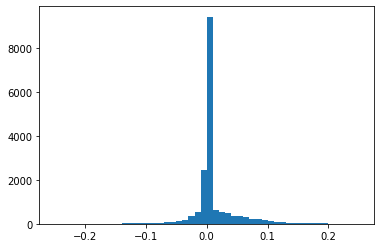

In [15]:
plt.hist((df_predictd_n - df_original_n).to_numpy().flatten(), bins=50, range=(-0.25, 0.25))
plt.show()